In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf

In [2]:
data= pd.read_csv("../Data/cancer_classification.csv")
data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  benign_0__mal_1  
0          0.4601                  0.11890                0  
1          0.2750                  0.08902                0  
2          0.3613                  0.08758                0  
3          0.6638                  0.17300                0  
4          0.2364                  0.07678                0  

[5 rows x 31 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:>

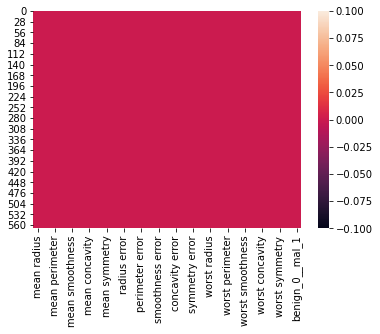

In [3]:
sns.heatmap(data.isnull())

In [5]:
data.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension  benign_0__mal_1  
count               569.000000       569.000000  
mean                  0.083946         0.627417  
std                   0.018061         0.483918  
min                   0.055040         0.000000  
25%                   0.071460         0.000000  
50%                   0.080040         1.000000  
75%                   0.092080         1.000000  
max                   0.207500         1.000000  

[8 rows x 31 columns]

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

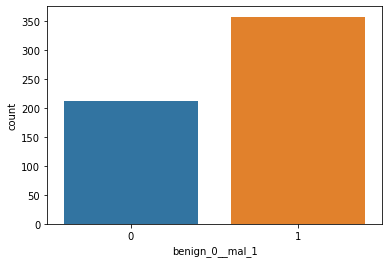

In [17]:
sns.countplot(x='benign_0__mal_1',data=data)

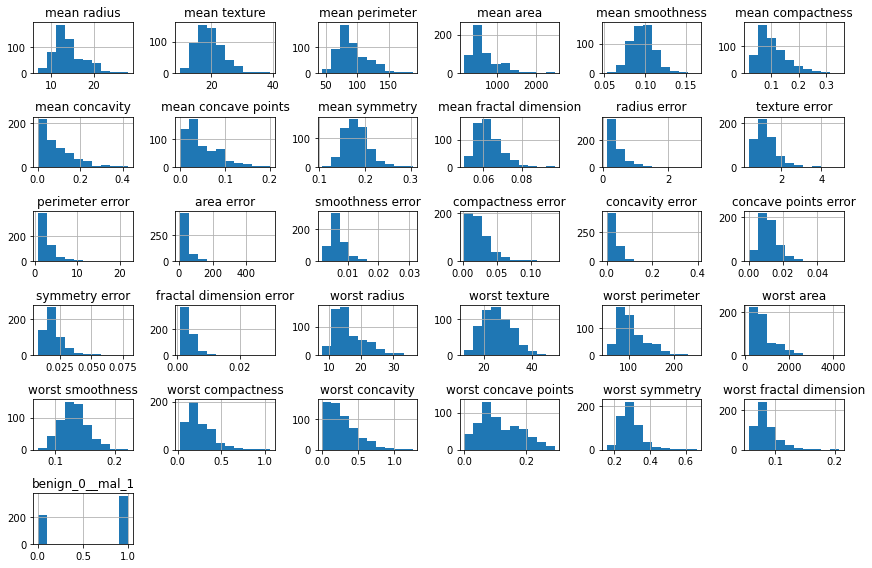

In [18]:
data.hist( figsize=(12,8))
plt.tight_layout()

<AxesSubplot:>

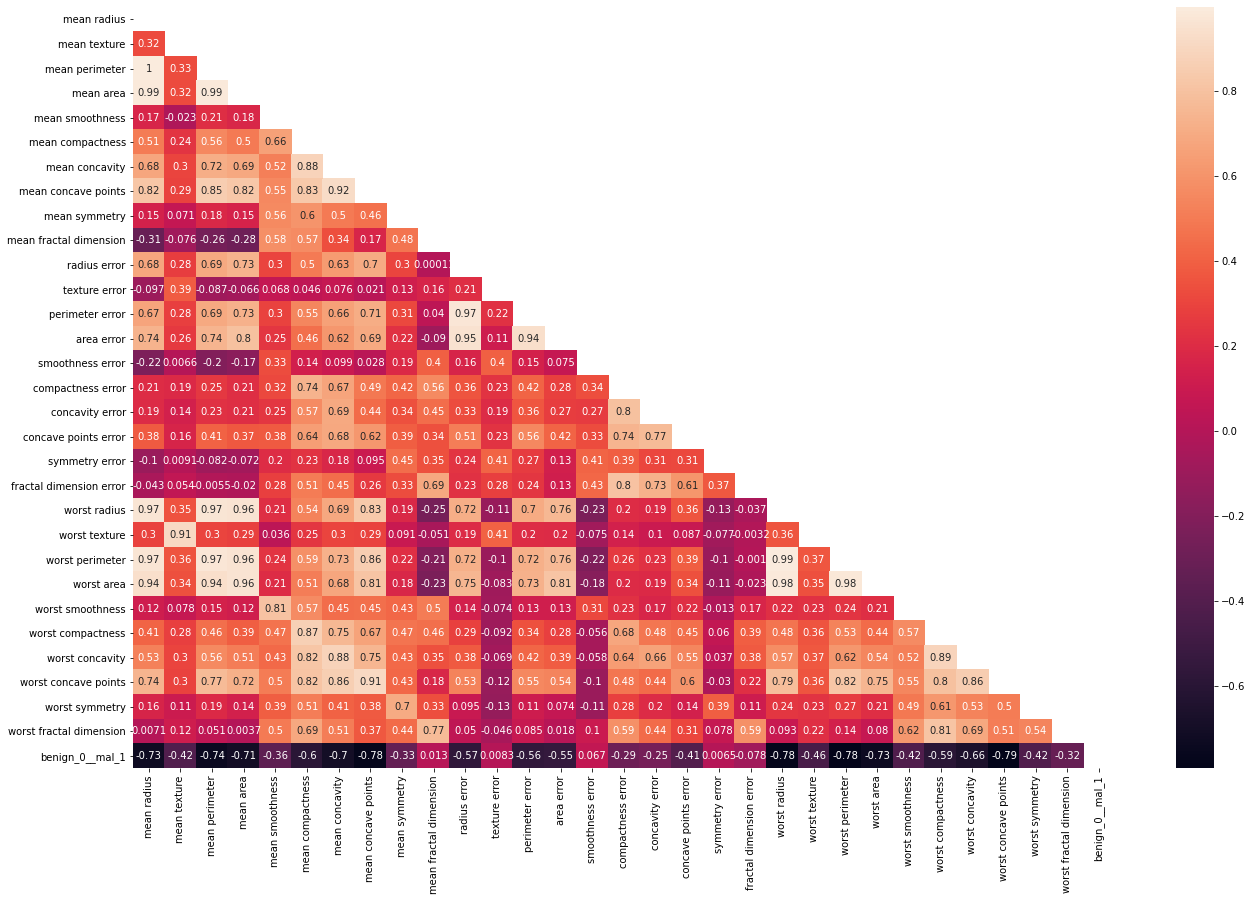

In [19]:
plt.figure(figsize=(22,14))
mat= data.corr()
sns.heatmap(mat, annot=True, mask=np.triu(mat))

<AxesSubplot:>

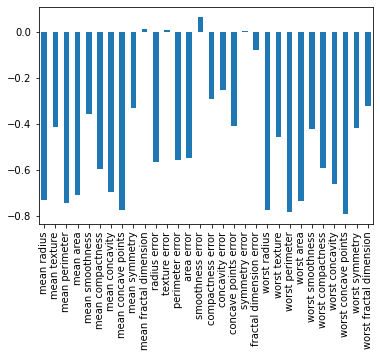

In [20]:
mat.iloc[-1,:-1].plot(kind="bar")

In [21]:
x= data.drop(labels="benign_0__mal_1", axis=1)
y= data.loc[:, "benign_0__mal_1"]
x.shape, y.shape

((569, 30), (569,))

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=42, test_size=0.3)

In [23]:
from sklearn.preprocessing import MinMaxScaler as scaler

scale= scaler()

x_train= scale.fit_transform(x_train)
x_test= scale.transform(x_test)

In [24]:
from tensorflow.keras import layers, optimizers, losses, Sequential,callbacks


In [25]:
x_train.shape,x_test.shape,y_train.shape

((398, 30), (171, 30), (398,))

In [47]:
tf.random.set_seed(42)

model1= Sequential([
    layers.InputLayer(input_shape=(30,)),
    layers.Dense(4, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
], name="model-1")

## For a binary classification problem 
model1.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(),metrics=['accuracy'])

model1_hist= model1.fit(x_train, y_train, epochs=300, validation_split=0.23)


==============================] - 0s 5ms/step - loss: 0.1560 - accuracy: 0.9575 - val_loss: 0.1593 - val_accuracy: 0.9565
Epoch 162/300
10/10 [==============================] - 0s 5ms/step - loss: 0.1552 - accuracy: 0.9542 - val_loss: 0.1578 - val_accuracy: 0.9565
Epoch 163/300
10/10 [==============================] - 0s 5ms/step - loss: 0.1545 - accuracy: 0.9575 - val_loss: 0.1581 - val_accuracy: 0.9565
Epoch 164/300
10/10 [==============================] - 0s 5ms/step - loss: 0.1532 - accuracy: 0.9542 - val_loss: 0.1574 - val_accuracy: 0.9565
Epoch 165/300
10/10 [==============================] - 0s 4ms/step - loss: 0.1526 - accuracy: 0.9575 - val_loss: 0.1554 - val_accuracy: 0.9565
Epoch 166/300
10/10 [==============================] - 0s 5ms/step - loss: 0.1516 - accuracy: 0.9575 - val_loss: 0.1543 - val_accuracy: 0.9565
Epoch 167/300
10/10 [==============================] - 0s 4ms/step - loss: 0.1506 - accuracy: 0.9575 - val_loss: 0.1537 - val_accuracy: 0.9565
Epoch 168/300
10/10 

<AxesSubplot:>

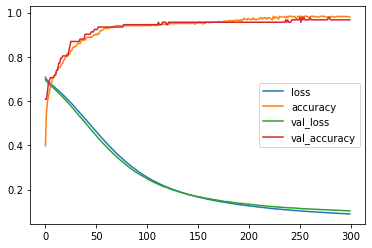

In [48]:
pd.DataFrame(model1.history.history).plot()

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

preds= tf.squeeze(model1.predict(x_test))
los, acc= model1.evaluate(x_test, y_test)
los, acc # OVERFITTING

6/6 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.9708


(0.07963737100362778, 0.9707602262496948)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



<AxesSubplot:>

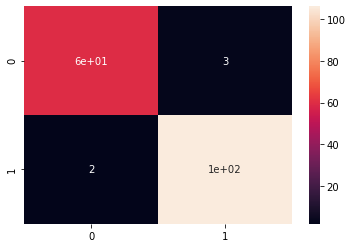

In [62]:
binary_preds= tf.round(preds)
print(classification_report(y_test, binary_preds))

sns.heatmap(confusion_matrix(y_test, binary_preds), annot=True, fmt=".1g")

In [66]:
# Model-2

tf.random.set_seed(42)

model2= Sequential([
    layers.InputLayer(input_shape=(30,)),
    layers.Dense(4, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
], name="model-2")

## For a binary classification problem 
model2.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(),metrics=['accuracy'])

model2_hist= model2.fit(x_train, y_train, epochs=300, validation_split=0.23)


[==============================] - 0s 5ms/step - loss: 0.0467 - accuracy: 0.9869 - val_loss: 0.0715 - val_accuracy: 0.9783
Epoch 162/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0447 - accuracy: 0.9902 - val_loss: 0.0734 - val_accuracy: 0.9783
Epoch 163/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0443 - accuracy: 0.9869 - val_loss: 0.0727 - val_accuracy: 0.9783
Epoch 164/300
10/10 [==============================] - 0s 5ms/step - loss: 0.0442 - accuracy: 0.9869 - val_loss: 0.0736 - val_accuracy: 0.9783
Epoch 165/300
10/10 [==============================] - 0s 5ms/step - loss: 0.0435 - accuracy: 0.9869 - val_loss: 0.0715 - val_accuracy: 0.9891
Epoch 166/300
10/10 [==============================] - 0s 5ms/step - loss: 0.0439 - accuracy: 0.9902 - val_loss: 0.0702 - val_accuracy: 0.9783
Epoch 167/300
10/10 [==============================] - 0s 5ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0704 - val_accuracy: 0.9783
Epoch 168/300
10/10

<AxesSubplot:>

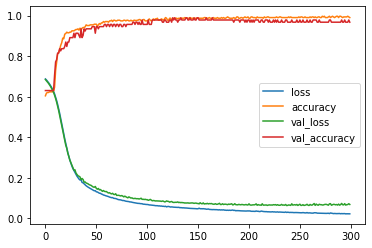

In [67]:
pd.DataFrame(model2.history.history).plot()

In [68]:
los, acc= model2.evaluate(x_test, y_test)
los, acc 
# OVERFITTING

6/6 [==============================] - 0s 833us/step - loss: 0.0913 - accuracy: 0.9708


(0.0912783071398735, 0.9707602262496948)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.99      0.96      0.98       108

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



<AxesSubplot:>

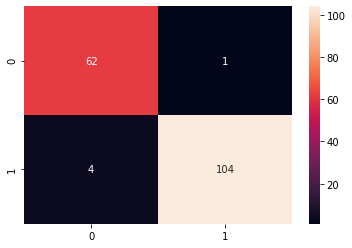

In [70]:
preds= tf.squeeze(model2.predict(x_test))
binary_preds= tf.round(preds)
print(classification_report(y_test, binary_preds))

sns.heatmap(confusion_matrix(y_test, binary_preds), annot=True, fmt="d")

In [78]:
# Model-3
'''
@ Adding Dropout layer and call backs 
'''

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

tf.random.set_seed(42)

model3= Sequential([
    layers.InputLayer(input_shape=(30,)),
    layers.Dense(30, activation="relu"),
    Dropout(0.5),
    layers.Dense(16, activation="relu"),
    Dropout(0.5),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
], name="model-3")

## For a binary classification problem 
model3.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(),metrics=['accuracy'])

model3_hist= model3.fit(x_train, y_train, epochs=300, validation_split=0.23, callbacks=[early_stop])

0.2726 - val_accuracy: 0.9022
Epoch 22/300
10/10 [==============================] - 0s 4ms/step - loss: 0.3646 - accuracy: 0.8693 - val_loss: 0.2581 - val_accuracy: 0.9022
Epoch 23/300
10/10 [==============================] - 0s 4ms/step - loss: 0.3598 - accuracy: 0.8660 - val_loss: 0.2446 - val_accuracy: 0.8913
Epoch 24/300
10/10 [==============================] - 0s 4ms/step - loss: 0.3790 - accuracy: 0.8660 - val_loss: 0.2415 - val_accuracy: 0.9022
Epoch 25/300
10/10 [==============================] - 0s 6ms/step - loss: 0.3461 - accuracy: 0.8660 - val_loss: 0.2328 - val_accuracy: 0.9022
Epoch 26/300
10/10 [==============================] - 0s 5ms/step - loss: 0.3355 - accuracy: 0.8660 - val_loss: 0.2411 - val_accuracy: 0.8913
Epoch 27/300
10/10 [==============================] - 0s 4ms/step - loss: 0.2935 - accuracy: 0.9020 - val_loss: 0.2305 - val_accuracy: 0.8913
Epoch 28/300
10/10 [==============================] - 0s 4ms/step - loss: 0.2883 - accuracy: 0.8856 - val_loss: 0.2081

<AxesSubplot:>

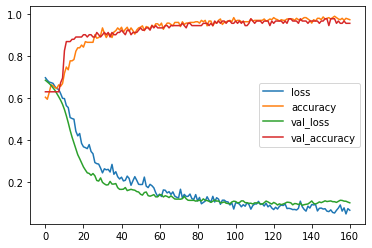

In [79]:
pd.DataFrame(model3_hist.history).plot()

In [80]:
los, acc= model3.evaluate(x_test, y_test)
los, acc 

6/6 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9766


(0.050562284886837006, 0.9766082167625427)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        63
           1       0.99      0.97      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



<AxesSubplot:>

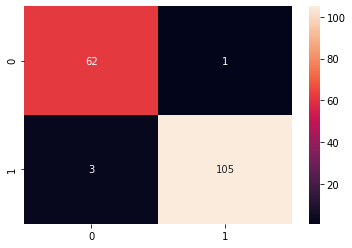

In [82]:
# preds= tf.squeeze(model2.predict(x_test))
# binary_preds= tf.round(preds)
binary_preds= model3.predict_classes(x_test)
print(classification_report(y_test, binary_preds))

sns.heatmap(confusion_matrix(y_test, binary_preds), annot=True, fmt="d")

In [93]:
# Model 4


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

tf.random.set_seed(42)

model4= Sequential([
    layers.InputLayer(input_shape=(30,)),
    layers.Dense(30, activation="relu"),
    Dropout(0.3),
    layers.Dense(16, activation="relu"),
    Dropout(0.3),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
], name="model-4")

## For a binary classification problem 
model4.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

model4_hist= model4.fit(x_train, y_train, epochs=300, validation_split=0.23, callbacks=[early_stop])

Epoch 1/300
10/10 [==============================] - 0s 30ms/step - loss: 0.6941 - accuracy: 0.6111 - val_loss: 0.6827 - val_accuracy: 0.6304
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.6438 - val_loss: 0.6677 - val_accuracy: 0.6522
Epoch 3/300
10/10 [==============================] - 0s 5ms/step - loss: 0.6691 - accuracy: 0.6373 - val_loss: 0.6503 - val_accuracy: 0.6739
Epoch 4/300
10/10 [==============================] - 0s 5ms/step - loss: 0.6524 - accuracy: 0.6928 - val_loss: 0.6291 - val_accuracy: 0.7609
Epoch 5/300
10/10 [==============================] - 0s 5ms/step - loss: 0.6394 - accuracy: 0.6961 - val_loss: 0.6058 - val_accuracy: 0.7500
Epoch 6/300
10/10 [==============================] - 0s 5ms/step - loss: 0.6202 - accuracy: 0.7418 - val_loss: 0.5788 - val_accuracy: 0.8261
Epoch 7/300
10/10 [==============================] - 0s 5ms/step - loss: 0.5939 - accuracy: 0.7516 - val_loss: 0.5467 - val_accuracy: 0.8370
Epoch 8/300


In [94]:
los, acc= model4.evaluate(x_test, y_test)
los, acc 

6/6 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9883


(0.03853892534971237, 0.988304078578949)

<AxesSubplot:>

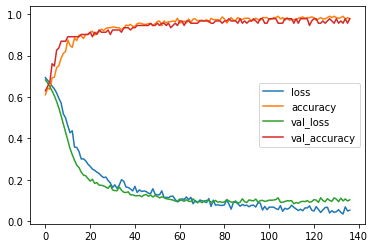

In [95]:
pd.DataFrame(model4_hist.history).plot()

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        63
           1       0.99      0.97      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



<AxesSubplot:>

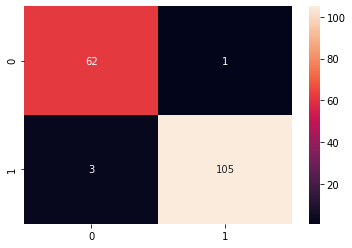

In [97]:
binary_preds= (model3.predict(x_test)> 0.5).astype("int32")
print(classification_report(y_test, binary_preds))

sns.heatmap(confusion_matrix(y_test, binary_preds), annot=True, fmt="d")

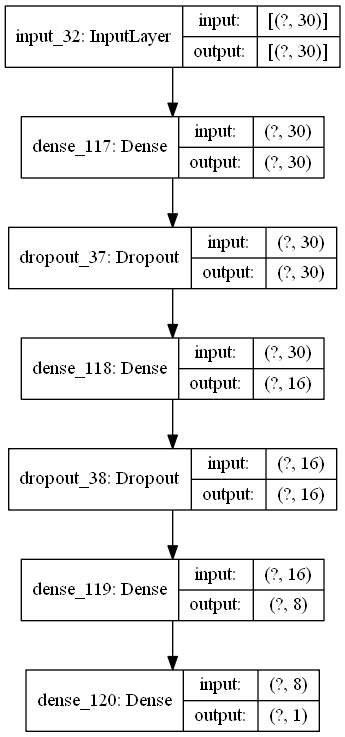

In [98]:
tf.keras.utils.plot_model(model=model4, show_shapes=True, show_layer_names=True)